<a href="https://colab.research.google.com/github/summerolmstead/HappinessLinearRegression/blob/main/HappinessAnalysisProject1_25_Linear_Regression_Olmstead.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Hello! This is a personal project to showcase my skills in creating a linear regression utilizing my econometric and data science knowledge. The following dataset was collected by the World Happiness Report which was uploaded to kaggle.

https://www.kaggle.com/datasets/ajaypalsinghlo/world-happiness-report-2023/data

# Background

The happiness scores and rankings use data from the Gallup World Poll . The columns following the happiness score estimate the extent to which each of six factors – economic production, social support, life expectancy, freedom, absence of corruption, and generosity – contribute to making life evaluations higher in each country than they are in Dystopia, a hypothetical country that has values equal to the world’s lowest national averages for each of the six factors. They have no impact on the total score reported for each country, but they do explain why some countries rank higher than others.

# Loading Dataset

In [1]:
import kagglehub

#download latest version from kaggle
path = kagglehub.dataset_download("ajaypalsinghlo/world-happiness-report-2023")

print("Path to dataset files:", path)

100%|██████████| 7.15k/7.15k [00:00<00:00, 11.1MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/ajaypalsinghlo/world-happiness-report-2023/versions/1


In [2]:
import os

#list files in the extracted dataset directory
path = "/root/.cache/kagglehub/datasets/ajaypalsinghlo/world-happiness-report-2023/versions/1"
files = os.listdir(path)

#display the list of files
print(files)


['WHR2023.csv']


In [3]:
import pandas as pd
#getting file path
csv_file_path = os.path.join(path, "WHR2023.csv")

#loading the CSV file
data = pd.read_csv(csv_file_path)

#check the first few rows
print(data.head())


  Country name  Ladder score  Standard error of ladder score  upperwhisker  \
0      Finland         7.804                           0.036         7.875   
1      Denmark         7.586                           0.041         7.667   
2      Iceland         7.530                           0.049         7.625   
3       Israel         7.473                           0.032         7.535   
4  Netherlands         7.403                           0.029         7.460   

   lowerwhisker  Logged GDP per capita  Social support  \
0         7.733                 10.792           0.969   
1         7.506                 10.962           0.954   
2         7.434                 10.896           0.983   
3         7.411                 10.639           0.943   
4         7.346                 10.942           0.930   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                   71.150                         0.961      -0.019   
1                   71.250            

# Cleaning

In [4]:
#summary of the dataset
print(data.info())

#check for missing values
print(data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 19 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country name                                137 non-null    object 
 1   Ladder score                                137 non-null    float64
 2   Standard error of ladder score              137 non-null    float64
 3   upperwhisker                                137 non-null    float64
 4   lowerwhisker                                137 non-null    float64
 5   Logged GDP per capita                       137 non-null    float64
 6   Social support                              137 non-null    float64
 7   Healthy life expectancy                     136 non-null    float64
 8   Freedom to make life choices                137 non-null    float64
 9   Generosity                                  137 non-null    float64
 10  Perceptions of

likely better to just get rid of the countries with one nan value as if we did do a prediction method it would skew the meaning of the data. its less likely each variable to be correlated to another to by explained by else (life expectancy & dystopia..)

In [5]:
#statistical summary of numerical columns
print(data.describe())

#the describe method for categorical variables
#print(data.describe(include=["object"]))


       Ladder score  Standard error of ladder score  upperwhisker  \
count    137.000000                      137.000000    137.000000   
mean       5.539796                        0.064715      5.666526   
std        1.139929                        0.023031      1.117421   
min        1.859000                        0.029000      1.923000   
25%        4.724000                        0.047000      4.980000   
50%        5.684000                        0.060000      5.797000   
75%        6.334000                        0.077000      6.441000   
max        7.804000                        0.147000      7.875000   

       lowerwhisker  Logged GDP per capita  Social support  \
count    137.000000             137.000000      137.000000   
mean       5.412971               9.449796        0.799073   
std        1.163724               1.207302        0.129222   
min        1.795000               5.527000        0.341000   
25%        4.496000               8.591000        0.722000   
50%   

In [6]:
# the column names for this df are
print(data.columns)

Index(['Country name', 'Ladder score', 'Standard error of ladder score',
       'upperwhisker', 'lowerwhisker', 'Logged GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Ladder score in Dystopia',
       'Explained by: Log GDP per capita', 'Explained by: Social support',
       'Explained by: Healthy life expectancy',
       'Explained by: Freedom to make life choices',
       'Explained by: Generosity', 'Explained by: Perceptions of corruption',
       'Dystopia + residual'],
      dtype='object')


1. Ladder Score (Happiness Score)
Mean: 5.54 (The average happiness score across the 137 countries is around 5.54 on a scale from 1 to 10.)
Standard Deviation (std): 1.14 (There's some variability in happiness scores among countries.)
Min/Max: The happiness scores range from 1.86 (the lowest) to 7.80 (the highest).
Quartiles: The 25th percentile is 4.72, 50th percentile (median) is 5.68, and the 75th percentile is 6.33.
2. Standard Error of Ladder Score
Mean: 0.0647 (This is a measure of the variability in the happiness scores, with a low mean indicating that the scores are relatively consistent across the countries.)
Min/Max: Ranges from 0.029 (very small error) to 0.147 (indicating a larger standard error for some countries).
3. Upper and Lower Whisker (for Ladder Score Range)
These columns provide the range (upper and lower whiskers) within which the happiness score likely falls, giving insight into the spread of data around the happiness scores.

The values are similar to the ladder score, with the upper whisker ranging from 4.98 to 7.87 and the lower whisker ranging from 1.80 to 7.73. This shows that for most countries, their happiness score is relatively close to the actual reported score (with some fluctuation).
4. Logged GDP per Capita
Mean: 9.45 (This suggests a high average GDP per capita in the countries within the dataset.)
Min/Max: Ranges from 5.53 to 11.66, indicating significant economic disparity across countries.
Quartiles: The 25th percentile is 8.59, the 50th percentile (median) is 9.57, and the 75th percentile is 10.54.
5. Social Support
Mean: 0.80 (This is relatively high, implying that most countries have strong social support systems.)
Min/Max: Ranges from 0.34 (lower social support) to 0.98 (higher social support).
Quartiles: The values are relatively high, with the 25th percentile at 0.72, the 50th percentile at 0.83, and the 75th percentile at 0.90, suggesting that social support is a key factor in most countries' happiness scores.
6. Healthy Life Expectancy
Mean: 64.97 (Most countries have an average life expectancy in the mid-60s, with some outliers that have lower or higher expectations.)
Min/Max: Ranges from 51.53 to 77.28 years, showing significant disparity in health outcomes across countries.
7. Freedom to Make Life Choices
Mean: 0.79 (This indicates that on average, people in the dataset's countries feel they have a good amount of freedom in life choices.)
Min/Max: Ranges from 0.38 to 0.96.
8. Generosity
Mean: 0.02 (This is quite low on average, implying that generosity (perhaps measured in terms of donations or volunteering) may not be a strong contributor to happiness in the dataset.)
Min/Max: Ranges from -0.25 (negative generosity) to 0.53 (relatively high generosity).
9. Perceptions of Corruption
Mean: 0.73 (A moderate level of perceived corruption across the countries in the dataset.)
Min/Max: Ranges from 0.15 (low perception of corruption) to 0.93 (high perception of corruption).
Quartiles: 0.67, 0.77, 0.85, suggesting that perceptions of corruption are quite prevalent in the dataset, with many countries at the higher end.
10. Ladder Score in Dystopia (Reference Value)
This is a constant value of 1.778 across all countries in the dataset. It's likely used as a baseline (representing a hypothetical dystopia), and it is subtracted from the happiness score to normalize the data (so that the "real" happiness score is presented).

11. Explained by Factors
These columns represent how much of the Ladder Score (Happiness Score) is explained by each of the factors in the dataset (e.g., GDP, social support, life expectancy, freedom, etc.). The closer the value is to 1, the more that factor explains the happiness score.

Explained by Log GDP per capita: Mean of 1.41, with values ranging from 0.0 to 2.2, suggesting that GDP per capita has a notable influence on happiness scores.
Explained by Social Support: Mean of 1.16, suggesting that social support is also an important factor in happiness.
Explained by Healthy Life Expectancy: Mean of 0.37, indicating that life expectancy plays a smaller role in the happiness scores, compared to GDP and social support.
Explained by Freedom: Mean of 0.54, which also has a moderate impact on happiness.
Explained by Generosity: A very low mean of 0.15, suggesting that generosity does not have a significant impact on the happiness score.
Explained by Perceptions of Corruption: Mean of 0.15, which is also relatively low.
12. Dystopia + Residual
This column represents the residual or unexplained part of the happiness score after subtracting out the explained factors. The mean is quite close to the original ladder score (1.78), which makes sense since the residual should represent the part of the happiness score not explained by the included factors.

General Insights:
Economic factors (GDP per capita) and social support seem to be the largest contributors to happiness, as seen in their higher explained values.
Health and freedom also play a role but to a lesser extent.
Generosity and perceptions of corruption have a relatively smaller effect on happiness scores.
The Dystopia value (constant) is used as a baseline, with countries’ happiness scores adjusted from that baseline.

In [7]:
print({data.shape}) # before dropping nan

{(137, 19)}


getting rid of NaN value rows

In [8]:
#identify rows with NaN values
countries_with_nan = data[data.isnull().any(axis=1)]
print("Countries dropped due to NaN values:")
print(countries_with_nan[['Country name']])

#now drop rows with any NaN values
data_clean = data.dropna(how='any')

#check the shape of the cleaned dataset
print(f"Shape of data after dropping rows: {data_clean.shape}")


Countries dropped due to NaN values:
          Country name
98  State of Palestine
Shape of data after dropping rows: (136, 19)


So we see that Palestine had two NaN values and we dropped this country due to not being able to predict what have been its predicted output accurately as each country has its own story.

given all of our variables are numeric, we dont need to do any change from categorical variables to be one hot encoded.

Checking for Outliers

In [9]:
from scipy import stats

# Keep 'Country' column for later use
country_names = data_clean['Country name']

# Calculate z-scores for numerical columns only (excluding 'Country')
z_scores = stats.zscore(data_clean.select_dtypes(include=['float64']).drop(columns=['Country name'], errors='ignore'))

# Get the absolute value of z-scores
abs_z_scores = abs(z_scores)

# Identify outliers (z-score > 3)
outliers = (abs_z_scores > 3)

# Print whether each value is an outlier
print(outliers)

# Number of rows with outliers
print(f"Number of rows with outliers: {outliers.any(axis=1).sum()}")

# Filter rows that are outliers, include 'Country' names
outlier_rows = data_clean[outliers.any(axis=1)]

# Display country names of rows that are outliers
outlier_countries = outlier_rows['Country name']
print(outlier_countries)

# Remove rows with outliers but keep 'Country' column intact
data_clean = data_clean[~outliers.any(axis=1)]


     Ladder score  Standard error of ladder score  upperwhisker  lowerwhisker  \
0           False                           False         False         False   
1           False                           False         False         False   
2           False                           False         False         False   
3           False                           False         False         False   
4           False                           False         False         False   
..            ...                             ...           ...           ...   
132         False                           False         False         False   
133         False                           False         False         False   
134         False                           False         False         False   
135         False                           False         False         False   
136          True                           False          True          True   

     Logged GDP per capita 

So the only country dropped is Norway as it has one outlier.

# Creating the Models

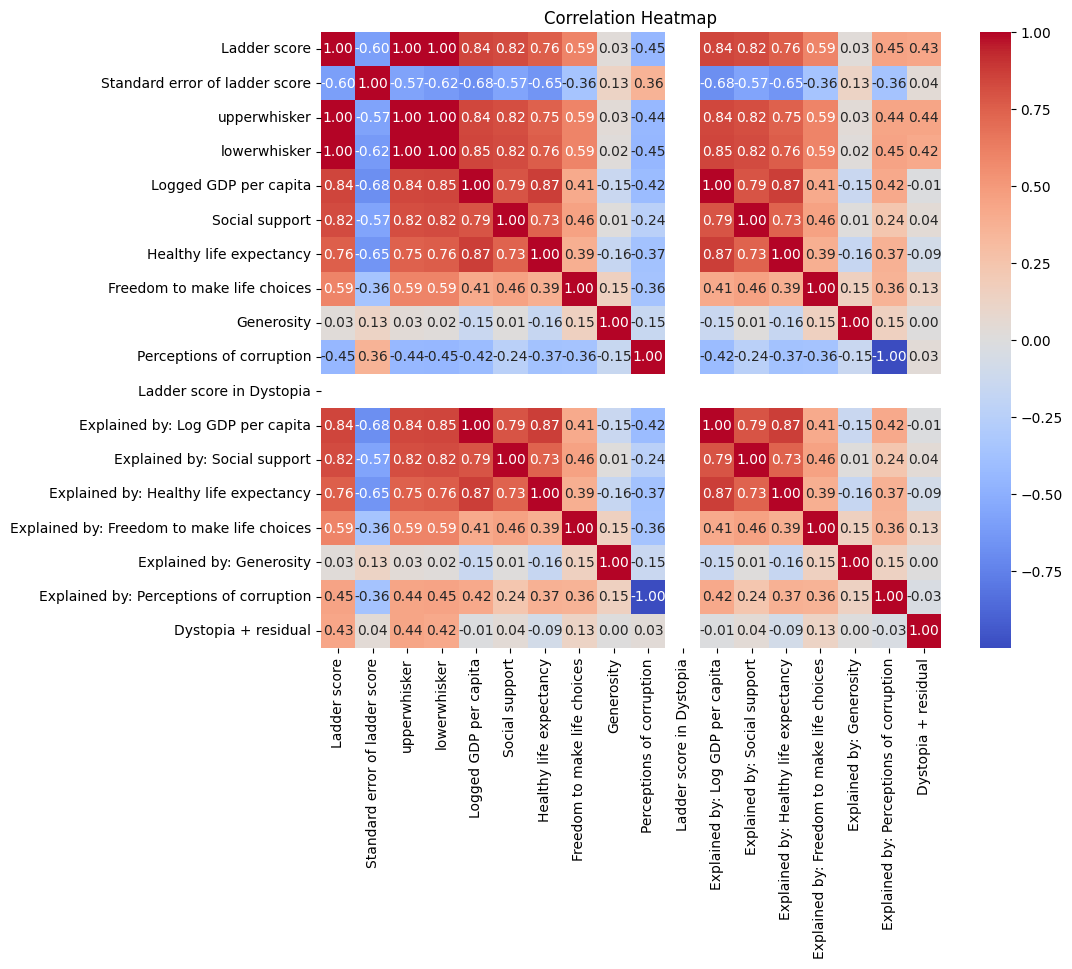

                                            Ladder score  \
Ladder score                                    1.000000   
Standard error of ladder score                 -0.595354   
upperwhisker                                    0.999528   
lowerwhisker                                    0.999566   
Logged GDP per capita                           0.843952   
Social support                                  0.821379   
Healthy life expectancy                         0.755428   
Freedom to make life choices                    0.594353   
Generosity                                      0.026748   
Perceptions of corruption                      -0.446732   
Ladder score in Dystopia                             NaN   
Explained by: Log GDP per capita                0.843940   
Explained by: Social support                    0.821557   
Explained by: Healthy life expectancy           0.755116   
Explained by: Freedom to make life choices      0.594330   
Explained by: Generosity                

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
#basic visualization before
#set 'Country' as the index so we can keep track of each county and it doesnt interfere with results of model
data_clean.set_index('Country name', inplace=True)

#select only numeric columns for correlation (excluding 'Country' which is now the index)
numerical_data = data_clean.select_dtypes(include=['float64'])

#compute the correlation matrix
corr = numerical_data.corr()

#plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

# displaying the correlation matrix alongside country names
print(corr)

data_clean1 = data_clean.copy() #clean copy for model


potential variables to call into models to see validity:

```
# index(['Country name', 'Ladder score', 'Standard error of ladder score',
       'upperwhisker', 'lowerwhisker', 'Logged GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Ladder score in Dystopia',
       'Explained by: Log GDP per capita', 'Explained by: Social support',
       'Explained by: Healthy life expectancy',
       'Explained by: Freedom to make life choices',
       'Explained by: Generosity', 'Explained by: Perceptions of corruption',
       'Dystopia + residual'],
```



# Model 1 | Base Model with GDP, Social Support, Healthy Life Expectancy

In [11]:
import statsmodels.api as sm
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#Scaling numerical columns .... ladder score can be target variable as this is the happiness measure
#first going to only have a small base model of these three variables and expand and take out as we go on
scaler = StandardScaler()
numerical_features = ['Logged GDP per capita', 'Social support', 'Healthy life expectancy']
data_clean1[numerical_features] = scaler.fit_transform(data_clean1[numerical_features])

# Define target and features
X = data_clean1[numerical_features]  # Only use the features you want
y = data_clean1['Ladder score']

# Add a constant (intercept) to the features matrix
X = sm.add_constant(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model using statsmodels
model = sm.OLS(y_train, X_train)  # Ordinary Least Squares regression
results = model.fit()  # Fit the model

# Print a detailed summary of the regression
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:           Ladder score   R-squared:                       0.767
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     105.3
Date:                Mon, 03 Feb 2025   Prob (F-statistic):           2.98e-30
Time:                        20:52:16   Log-Likelihood:                -74.789
No. Observations:                 100   AIC:                             157.6
Df Residuals:                      96   BIC:                             168.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

in a 95% confidence interval, we can conclude so far the logged gdp per capita and social support are statistically significant with a |t value| > 1.96 whereas healthy life expectancy for now is insignificant. We will begin working through more models and once we get to a good one, we can begin to correct for errors and heteroskedasticity etc to make sure the 7 assumptions of linear regressions are being accurately represented.

# Model 2 | Adding Freedom to Make Life Choices

In [12]:
scaler2 = StandardScaler()
numerical_features2 = ['Logged GDP per capita', 'Social support','Healthy life expectancy','Freedom to make life choices'] #keepings healthy life expectancy to see if changes over time

data_clean2 = data_clean.copy() #clean copy for model
data_clean2[numerical_features2] = scaler2.fit_transform(data_clean2[numerical_features2])

# Define target and features
X2 = data_clean2[numerical_features2]  # Only use the features you want
y2 = data_clean2['Ladder score']

# Add a constant (intercept) to the features matrix
X2 = sm.add_constant(X2)

# Split data into training and testing sets
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

# Fit the model using statsmodels
model2 = sm.OLS(y2_train, X2_train)  # Ordinary Least Squares regression
results2 = model2.fit()  # Fit the model

print(results2.summary())

                            OLS Regression Results                            
Dep. Variable:           Ladder score   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     108.6
Date:                Mon, 03 Feb 2025   Prob (F-statistic):           1.44e-34
Time:                        20:52:16   Log-Likelihood:                -61.715
No. Observations:                 100   AIC:                             133.4
Df Residuals:                      95   BIC:                             146.5
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

Notes: Higher R squared which is great as we are explaining more about the model at roughly 82% of explaining happiness by the happiness score. We see that healthy life expectancy still is not statistically significant at a t score at 0.026 in 95% confidence. Therefore, we will likely take it out soon as it is fairly unnecessary. However, we see all other variables including our new one added, freedom to make life choices, have significance in our model. Therefore, as we continue making more models we could conclude that freedom to make life choices is likely a relevant variable to keep.

# Model 3 | Adding Perceptions of Corruption

In [13]:
scaler3 = StandardScaler()
numerical_features3 = ['Logged GDP per capita', 'Social support','Freedom to make life choices','Perceptions of corruption'] #adding corruption measurement & took out health life expectancy

data_clean3 = data_clean.copy() #clean copy for model
data_clean3[numerical_features3] = scaler3.fit_transform(data_clean3[numerical_features3])

# Define target and features
X3 = data_clean3[numerical_features3]
y3 = data_clean3['Ladder score']

# Add a constant (intercept) to the features matrix
X3 = sm.add_constant(X3)

# Split data into training and testing sets
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.2, random_state=42)

# Fit the model using statsmodels
model3 = sm.OLS(y3_train, X3_train)  # Ordinary Least Squares regression
results3 = model3.fit()  # Fit the model

print(results3.summary())

                            OLS Regression Results                            
Dep. Variable:           Ladder score   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     112.8
Date:                Mon, 03 Feb 2025   Prob (F-statistic):           3.31e-35
Time:                        20:52:16   Log-Likelihood:                -60.162
No. Observations:                 100   AIC:                             130.3
Df Residuals:                      95   BIC:                             143.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

Note: When took out healthy life expectancy in first run with same other 3 variables from previous model, the r-squared stayed th same so we can continue with knowling it likely does not have an impact on ladder score. Will add it back in later when closer to fully specified model to make sure. Interesting - perceptions of corruption is under a significant t score at |-1.731| < 1.96 . For now we could say that corruption is not as significant and it also did not really have an effect onto the r-squared at 82% still

# Model 4 | Adding Generosity

In [19]:
scaler4 = StandardScaler()
numerical_features4 = ['Logged GDP per capita', 'Social support','Freedom to make life choices','Generosity'] #generosity added to see effect

data_clean4 = data_clean.copy() #clean copy for model
data_clean4[numerical_features4] = scaler4.fit_transform(data_clean4[numerical_features4])

# Define target and features
X4 = data_clean4[numerical_features4]
y4 = data_clean4['Ladder score']

# Add a constant (intercept) to the features matrix
X4 = sm.add_constant(X4)

# Split data into training and testing sets
X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, test_size=0.2, random_state=42)

# Fit the model using statsmodels
model4 = sm.OLS(y4_train, X4_train)  # Ordinary Least Squares regression
results4 = model4.fit()

print(results4.summary())

                            OLS Regression Results                            
Dep. Variable:           Ladder score   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     112.5
Date:                Mon, 03 Feb 2025   Prob (F-statistic):           3.70e-35
Time:                        21:03:07   Log-Likelihood:                -60.280
No. Observations:                 100   AIC:                             130.6
Df Residuals:                      95   BIC:                             143.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

The R-Squared has not really changed still at .81-82 for R-Squared. Generosity has t value of 1.663 (insigificant in 95% confidence) and appears to be not affecting the model much. From this, we can say for now it does not seem to be super significant. However, social support and generosity seem similar so it could be that social support is accounting some for generosity.

# Model 5 | Interaction Variable Healthy Life x Corruption

Lets add an interactive variable to see if we can increase our r squared

In [21]:
scaler5 = StandardScaler()
data_clean5 = data_clean.copy() #clean copy for model

#lets make a interaction variable of corruption and healthy life expectancy as they could go hand in hand if the government is more corrupt they may not care as much of the physical quality of life of their citizens
data_clean5['Corruption_Healthy'] = data_clean5['Perceptions of corruption']*data_clean5['Healthy life expectancy']
numerical_features5 = ['Logged GDP per capita', 'Social support','Freedom to make life choices','Corruption_Healthy','Perceptions of corruption','Healthy life expectancy']

data_clean5[numerical_features5] = scaler5.fit_transform(data_clean5[numerical_features5])

# Define target and features
X5 = data_clean5[numerical_features5]
y5 = data_clean5['Ladder score']

# Add a constant (intercept) to the features matrix
X5 = sm.add_constant(X5)

# Split data into training and testing sets
X5_train, X5_test, y5_train, y5_test = train_test_split(X5, y5, test_size=0.2, random_state=42)


model5 = sm.OLS(y5_train, X5_train)  # Ordinary Least Squares regression
results5 = model5.fit()  # Fit the model

print(results5.summary())

                            OLS Regression Results                            
Dep. Variable:           Ladder score   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     73.81
Date:                Mon, 03 Feb 2025   Prob (F-statistic):           3.41e-33
Time:                        21:10:05   Log-Likelihood:                -60.059
No. Observations:                 100   AIC:                             134.1
Df Residuals:                      93   BIC:                             152.4
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

Corruption_Healthy (Interaction term):
The coefficient is positive (0.3141), but it’s not statistically significant (p-value = 0.661), meaning we can't confidently say there’s a relationship between this interaction term and the Ladder score. Even though it’s positive, the high p-value suggests the effect might be due to random variation rather than a meaningful relationship.
Perceptions of corruption:

The coefficient is negative (-0.4359), meaning that perceptions of corruption are associated with a decrease in the Ladder score. However, the p-value is also high (0.574), indicating that this effect is not statistically significant either. We can’t confidently claim that perceptions of corruption have a real effect on the outcome.
Healthy life expectancy:

The coefficient is negative (-0.1275), which suggests that healthy life expectancy is associated with a decrease in the Ladder score. But again, the p-value is large (not significant), meaning this effect is likely not statistically meaningful either.

Interestingly enough this outcome showcases we probably do not need any of these variables in our model as it does not really add anything... However, it is interesting the interaction variable was positive when alone the variables were negative.

# Model 6 | Interaction Variable Generosity x Social Support

In [23]:
#intuitively social support and generosity fairly makes sense if they go hand in hand. let's see!

scaler6 = StandardScaler()
data_clean6 = data_clean.copy() #clean copy for model

data_clean6['SocialSupport_Generosity'] = data_clean6['Social support']*data_clean6['Generosity']
numerical_features6 = ['Logged GDP per capita', 'Social support','Freedom to make life choices','SocialSupport_Generosity','Generosity']

data_clean6[numerical_features6] = scaler6.fit_transform(data_clean6[numerical_features6])

# Define target and features
X6 = data_clean6[numerical_features6]
y6 = data_clean6['Ladder score']

# Add a constant (intercept) to the features matrix
X6 = sm.add_constant(X6)

# Split data into training and testing sets
X6_train, X6_test, y6_train, y6_test = train_test_split(X6, y6, test_size=0.2, random_state=42)


model6 = sm.OLS(y6_train, X6_train)  # Ordinary Least Squares regression
results6 = model6.fit()  # Fit the model

print(results6.summary())

                            OLS Regression Results                            
Dep. Variable:           Ladder score   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     89.07
Date:                Mon, 03 Feb 2025   Prob (F-statistic):           4.16e-34
Time:                        21:18:52   Log-Likelihood:                -60.272
No. Observations:                 100   AIC:                             132.5
Df Residuals:                      94   BIC:                             148.2
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

Interestingly enough, this is also insignificant still - generosity and our interaction variable for here. We will not include and move on and keep on testing others

Model 7 | Interaction Variable Freedom x GDP

In [27]:
# if people have good amounts of money and feel free they probably are happier
scaler7 = StandardScaler()
data_clean7 = data_clean.copy() #clean copy for model

data_clean7['GDP_Freedom'] = data_clean7['Logged GDP per capita']*data_clean7['Freedom to make life choices']
numerical_features7 = ['Logged GDP per capita', 'Social support','GDP_Freedom'] #originally had freedom in it as well but took it out bc multicollineairty issue

data_clean7[numerical_features7] = scaler7.fit_transform(data_clean7[numerical_features7])

# Define target and features
X7 = data_clean7[numerical_features7]
y7 = data_clean7['Ladder score']

# Add a constant (intercept) to the features matrix
X7 = sm.add_constant(X7)

# Split data into training and testing sets
X7_train, X7_test, y7_train, y7_test = train_test_split(X7, y7, test_size=0.2, random_state=42)

model7 = sm.OLS(y7_train, X7_train)  # Ordinary Least Squares regression
results7 = model7.fit()  # Fit the model

print(results7.summary())

                            OLS Regression Results                            
Dep. Variable:           Ladder score   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     151.3
Date:                Mon, 03 Feb 2025   Prob (F-statistic):           2.92e-36
Time:                        21:33:05   Log-Likelihood:                -60.341
No. Observations:                 100   AIC:                             128.7
Df Residuals:                      96   BIC:                             139.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     5.59

Wow this is very interesting results! We so see that GDP's and Freedoms impact turned negative whereas the variable of them together,GDP_Freedom, is positive and extremely significant! However, this take away the significance of the variables alone which they were all along before this interaction variable.... The interaction term is explaining the shared variance: Before adding the interaction term, GDP and Freedom each explained their own unique contributions to the Ladder score. But with the interaction term, you're essentially saying, "The effect of GDP on Ladder score depends on the level of freedom, and the effect of freedom depends on GDP." Now, the interaction term explains much of what GDP and Freedom were each explaining on their own, which leads them to lose significance when modeled separately.

In [28]:
#lets check VIF
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

#first, make sure you add a constant to the feature set
X7 = sm.add_constant(X7)

#calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["feature"] = X7.columns
vif_data["VIF"] = [variance_inflation_factor(X7.values, i) for i in range(X7.shape[1])]

print(vif_data) #results show super high correlation which makes since haha we will take one out then - took out freedom alone in this model and significantly dropped the multicollinearity

                 feature       VIF
0                  const  1.000000
1  Logged GDP per capita  4.094628
2         Social support  2.799492
3            GDP_Freedom  3.285143


After taking out freedom alone variable - we see that the r squared is now 82.5% and the adjusted is 82% which is like .5 better than how it was before adding the interaction variable. it makes me wonder if we should even keep it or not.... i think for my final model i would rather not and just see the stand alone effect as in my opinion it just explains more.

# Model 8 | GDP^2

In [29]:
scaler8 = StandardScaler()
data_clean8 = data_clean.copy() #clean copy for model

data_clean8['GDP2'] = data_clean8['Logged GDP per capita']**2
numerical_features8 = ['Logged GDP per capita', 'Social support','Freedom to make life choices','GDP2']

data_clean8[numerical_features8] = scaler8.fit_transform(data_clean8[numerical_features8])

# Define target and features
X8 = data_clean8[numerical_features8]
y8 = data_clean8['Ladder score']

# Add a constant (intercept) to the features matrix
X8 = sm.add_constant(X8)

# Split data into training and testing sets
X8_train, X8_test, y8_train, y8_test = train_test_split(X8, y8, test_size=0.2, random_state=42)


model8 = sm.OLS(y8_train, X8_train)  # Ordinary Least Squares regression
results8 = model8.fit()  # Fit the model

print(results8.summary())

                            OLS Regression Results                            
Dep. Variable:           Ladder score   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     114.3
Date:                Mon, 03 Feb 2025   Prob (F-statistic):           2.00e-35
Time:                        21:40:55   Log-Likelihood:                -59.631
No. Observations:                 100   AIC:                             129.3
Df Residuals:                      95   BIC:                             142.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

Logged GDP per capita has a negative coefficient (-0.8802), but it's not statistically significant (p-value = 0.210) meaning this term alone doesn’t significantly affect the Ladder score in your model.

GDP^2  has a positive coefficient (1.3845) and is statistically significant (p-value = 0.047) meaning the squared term has a significant relationship with the Ladder score. This suggests that there is a non-linear relationship between GDP and Ladder score.

Diminishing Returns:
The negative sign for the linear term (GDP) and the positive sign for the quadratic term (GDP^2) implies that as GDP per capita increases, the Ladder score initially increases, but at a diminishing rate. This is the classic diminishing returns effect, which states that after a certain point, additional increases in GDP lead to smaller increases in well-being or happiness.

In [32]:
#calculating the point where there is no more benefit from gdp to happiness essentially:
beta1 = -0.8802  #coefficient of GDP (Logged GDP per capita)
beta2 = 1.3845   #coefficient of GDP^2 (quadratic term)

#calculate the turning point where the slope is 0
turning_point_gdp = -beta1 / (2 * beta2)

#calculate the slope of GDP at the turning point (first derivative)
slope_at_turning_point = beta1 + 2 * beta2 * turning_point_gdp

print(f"Turning point of GDP (where slope = 0): {turning_point_gdp}")
print(f"Slope of GDP at the turning point: {slope_at_turning_point}")

import numpy as np #need bc its easier for exp function lol

#turning point from previous calculation
turning_point_log_gdp = 0.318  # This is the log-transformed GDP

#convert log GDP back one
turning_point_gdp_actual = np.exp(turning_point_log_gdp)

print(f"Actual Logged GDP per capita at turning point: {turning_point_gdp_actual}")

Turning point of GDP (where slope = 0): 0.3178764897074756
Slope of GDP at the turning point: 0.0
Actual GDP per capita at turning point: 1.3743762612275612


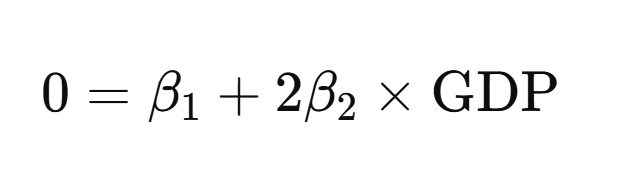

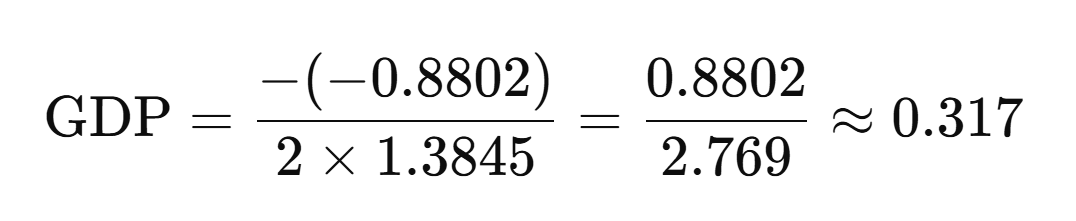

In [33]:
# now what is the actual real value though?
#turning point in log scale
turning_point_log_gdp = 1.374  #this is the log-transformed GDP value

#convert log GDP to the actual GDP per capita
turning_point_gdp_actual = np.exp(turning_point_log_gdp)

print(f"Actual GDP per capita at the turning point: {turning_point_gdp_actual}")


Actual GDP per capita at the turning point: 3.9511236230770037


If 1.374 is the log-transformed GDP per capita value, then the corresponding actual GDP per capita is:

GDP=𝑒^1.374≈3.95

This would mean that around 3,951 USD GDP per capita is the turning point where the marginal happiness return starts to flatten. In other words, when GDP per capita is around $3,951, increases in GDP no longer significantly contribute to the Ladder score.

So far, this has generally been the most significant and model which explains to us the most! Therefore, we will just go ahead and run with this model :)

# Final Model - Heteroskedasticity, White's Test, Robust, Autocorrelation Checks

In [34]:
#we will presume with keeping model 8
# lets first check for heteroskedasticity
import statsmodels.stats.api as sms

#White's test
white_test = sms.het_white(results8.resid, results8.model.exog)
#test statistic and p-value
print(f"White's Test Statistic: {white_test[0]}")
print(f"White's Test p-value: {white_test[1]}")

White's Test Statistic: 18.451392848617786
White's Test p-value: 0.1411200958187326


The p-value is 0.1411, which is greater than the common significance level threshold of 0.05. This means that you fail to reject the null hypothesis. In other words, based on this test, there is no strong evidence of heteroscedasticity in your model.

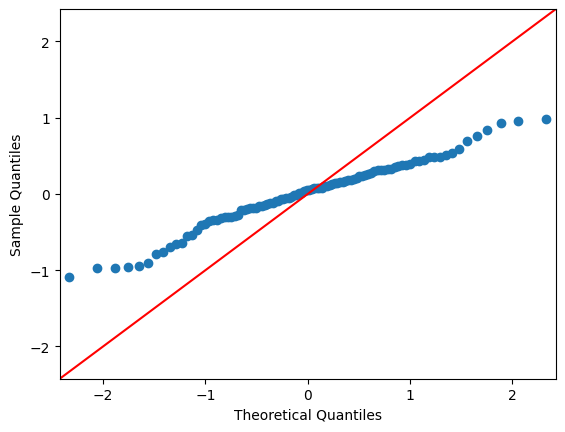

In [35]:
import matplotlib.pyplot as plt
import scipy.stats as stats

#plotting Q-Q plot for residuals
sm.qqplot(results8.resid, line ='45')
plt.show()

Hmm my residuals are not the best lol we should probably account for this by following the adjusted squared error

In [36]:
#for autocorrelation:
from statsmodels.stats.stattools import durbin_watson

#checking the Durbin-Watson statistic (which is already in the results)
dw_statistic = durbin_watson(results8.resid)
print(f"Durbin-Watson Statistic: {dw_statistic}")

Durbin-Watson Statistic: 1.8835360620623274


DW Statistic Range: The Durbin-Watson statistic typically ranges from 0 to 4:
DW ≈ 2: No autocorrelation (the residuals are independent).
DW < 2: Positive autocorrelation (residuals are correlated in a positive way).
DW > 2: Negative autocorrelation (residuals are correlated in a negative way).


This value is close to 2, indicating that there is no significant autocorrelation in your residuals. Since it's between 1.5 and 2.5, you can generally conclude that there is no strong autocorrelation in the residuals, and your model is likely appropriate in terms of the independence of errors.

In [37]:
#fit the model with robust standard errors to account for residuals in above plot not following the line closely
robust_results = model8.fit(cov_type='HC3')  # 'HC3' is a commonly used robust standard error estimator

print(robust_results.summary())

                            OLS Regression Results                            
Dep. Variable:           Ladder score   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     109.3
Date:                Mon, 03 Feb 2025   Prob (F-statistic):           1.13e-34
Time:                        22:17:21   Log-Likelihood:                -59.631
No. Observations:                 100   AIC:                             129.3
Df Residuals:                      95   BIC:                             142.3
Df Model:                           4                                         
Covariance Type:                  HC3                                         
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

# Final Model Visualization

In [38]:
#get model coefficients and intercept
coefficients = robust_results.params
intercept = coefficients[0]  #first element is the intercept

#get variable names (excluding intercept)
features = coefficients.index[1:]

#equation
equation = f"Y = {intercept:.4f} "
for feature, coef in zip(features, coefficients[1:]):  # Exclude intercept for features
    equation += f"+ ({coef:.4f} * {feature}) "

print("Regression Equation:")
print(equation)

Regression Equation:
Y = 5.5979 + (-0.8802 * Logged GDP per capita) + (0.3155 * Social support) + (0.2845 * Freedom to make life choices) + (1.3845 * GDP2) 


<ipython-input-38-d1db906b2c59>:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept = coefficients[0]  #first element is the intercept


Regression Equation:
**Ladder Score = 5.5979 -0.8802*Logged GDP per capita + 0.3155*Social support + 0.2845*Freedom to make life choices + 1.3845*GDP^2**

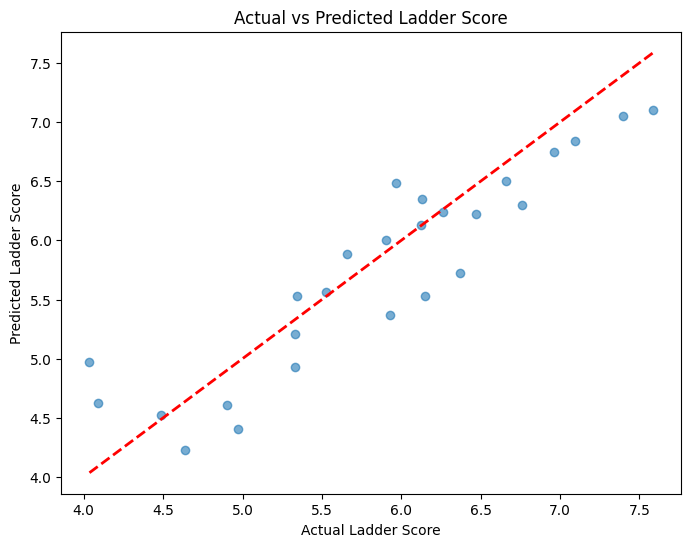

In [40]:
#Plot Actual vs Predicted values
plt.figure(figsize=(8,6))
plt.scatter(y8_test, robust_results.predict(X8_test), alpha=0.6)
plt.plot([y8_test.min(), y8_test.max()], [y8_test.min(), y8_test.max()], 'r--', lw=2)
plt.xlabel("Actual Ladder Score")
plt.ylabel("Predicted Ladder Score")
plt.title("Actual vs Predicted Ladder Score")
plt.show()